Brazilian E-Commerce Analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
customers = pd.read_csv("Brazilian E-Commerce Analysis/olist_customers_dataset.csv")
geolocation = pd.read_csv('Brazilian E-Commerce Analysis/olist_geolocation_dataset.csv')
order_items = pd.read_csv('Brazilian E-Commerce Analysis/olist_order_items_dataset.csv')
payments = pd.read_csv('Brazilian E-Commerce Analysis/olist_order_payments_dataset.csv')
reviews = pd.read_csv('Brazilian E-Commerce Analysis/olist_order_reviews_dataset.csv')
orders = pd.read_csv("Brazilian E-Commerce Analysis/olist_orders_dataset.csv")
products = pd.read_csv('Brazilian E-Commerce Analysis/olist_products_dataset.csv')
seller_dataset = pd.read_csv('Brazilian E-Commerce Analysis/olist_sellers_dataset.csv')
product_category_name = pd.read_csv('Brazilian E-Commerce Analysis/product_category_name_translation.csv')


In [26]:
#Checking the first few rows of the datasets
print(customers.head())
print(order_items.head())
print(payments.head())
print(reviews.head())
print(orders.head())
print(products.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3          

In [28]:
#Summary of statistics
print(customers.describe())
print(order_items.describe())
print(payments.describe())
print(reviews.describe())
print(orders.describe())
print(products.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
m

In [30]:
#Merging any common columns between datasets
merged_data = pd.merge(orders, order_items, on='order_id', how='left')
merged_data = pd.merge(merged_data, products, on='product_id', how='left')
merged_data = pd.merge(merged_data, customers, on='customer_id', how='left')
merged_data = pd.merge(merged_data, reviews, on='order_id', how='left')
merged_data = pd.merge(merged_data, payments, on='order_id', how='left')

In [32]:
#Checking for any missing values
print(customers.isnull().sum())
print(order_items.isnull().sum())
print(payments.isnull().sum())
print(reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

In [34]:
#Renaming columns
corrections={
     'product_name_lenght':'product_name_length',
    'product_description_lenght':'product_description_length',
}
products= products.rename(columns=corrections)

In [36]:
#Dropping rows with any missing values
dropna_columns = {
    'orders':['order_delivered_customer_date','order_approved_at','order_delivered_carrier_date'],
    'reviews': ['review_comment_title','review_comment_message'],
    'products':['product_category_name','product_name_length','product_description_length',
               'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']
}

for df_name, columns in dropna_columns.items():
    globals()[df_name] = globals()[df_name].dropna(subset=columns)


In [38]:
#Checking and removing duplicates
dfs = {'customers': customers, 'order_items': order_items, 'payments': payments, 'reviews': reviews, 'orders': orders, 'products': products}

def check_and_remove_duplicates(df, name):
    duplicates = df[df.duplicated()]
    print(f"Number of duplicate rows in {name}: {duplicates.shape[0]}")
    df_no_duplicates = df.drop_duplicates()
    return df_no_duplicates

for name, df in dfs.items():
    dfs[name] = check_and_remove_duplicates(df, name)
    

Number of duplicate rows in customers: 0
Number of duplicate rows in order_items: 0
Number of duplicate rows in payments: 0
Number of duplicate rows in reviews: 0
Number of duplicate rows in orders: 0
Number of duplicate rows in products: 0


In [40]:
#Converting columns to datetime format
datetime_columns = {
   'reviews':['review_creation_date'],
    'order_items':['shipping_limit_date'],
    'orders': [
        'order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'
    ]
}


for df_name, columns in datetime_columns.items():
    for column in columns:
        globals()[df_name][column] = pd.to_datetime(globals()[df_name][column])

Missing values in datetime columns after conversion:
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


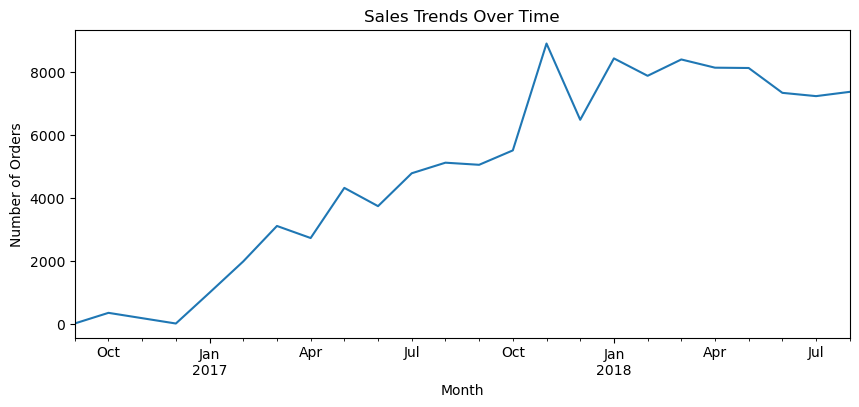

In [44]:
datetime_columns = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for column in datetime_columns:
    merged_data[column] = pd.to_datetime(merged_data[column], errors='coerce')

missing_values = merged_data[datetime_columns].isna().sum()
print("Missing values in datetime columns after conversion:")
print(missing_values)

merged_data = merged_data.dropna(subset=datetime_columns)
merged_data['order_purchase_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = merged_data.groupby('order_purchase_month').size()

plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='line')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

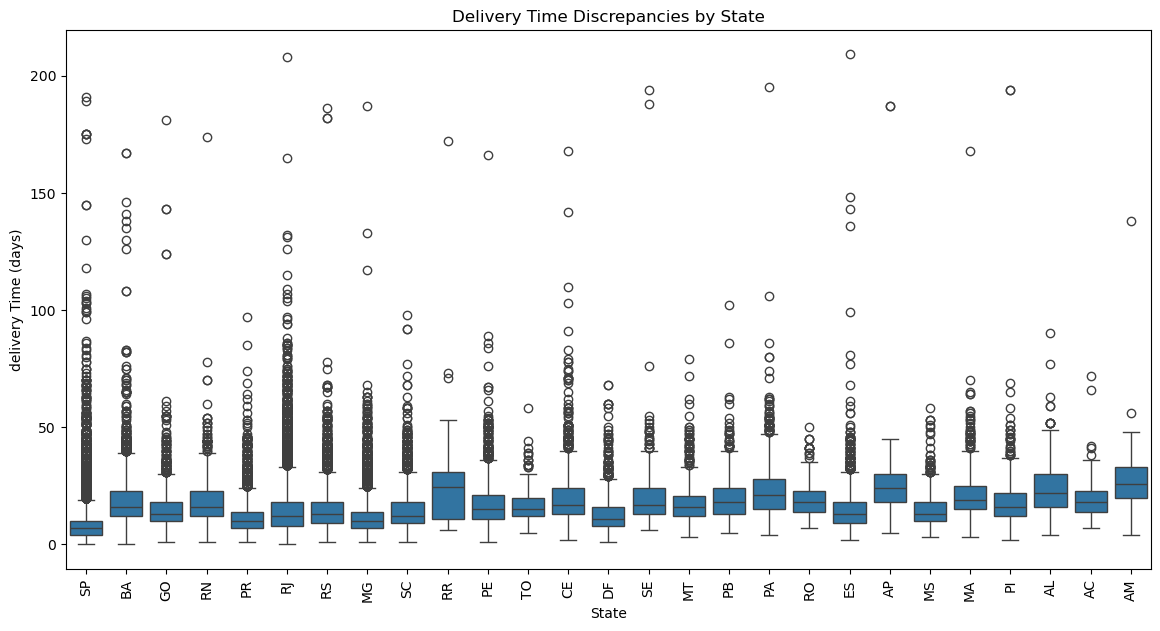

In [46]:
merged_data['delivery_time_days'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days

plt.figure(figsize=(14,7))
sns.boxplot(data=merged_data, x='customer_state', y='delivery_time_days')
plt.title('Delivery Time Discrepancies by State')
plt.xlabel('State')
plt.ylabel('delivery Time (days)')
plt.xticks(rotation=90)
plt.show()

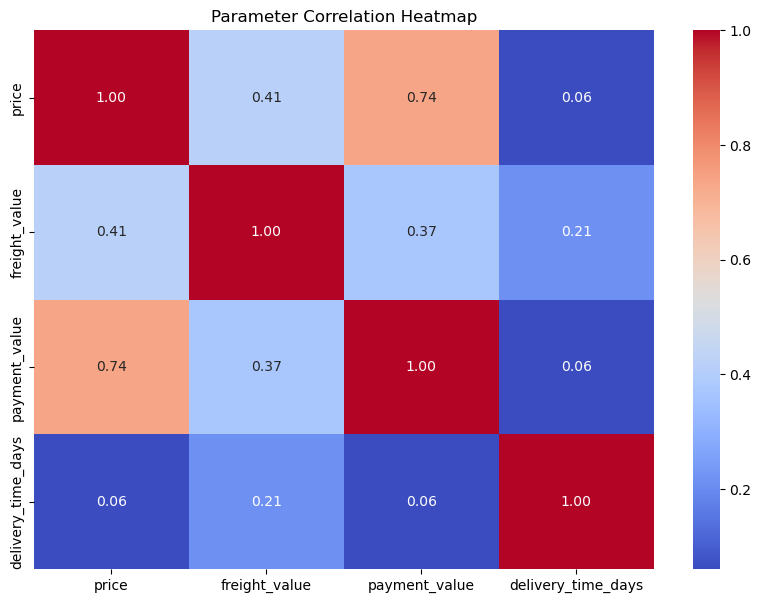

In [48]:
numeric_cols = ['price', 'freight_value', 'payment_value', 'delivery_time_days']

correlation_matrix = merged_data[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Parameter Correlation Heatmap')
plt.show()

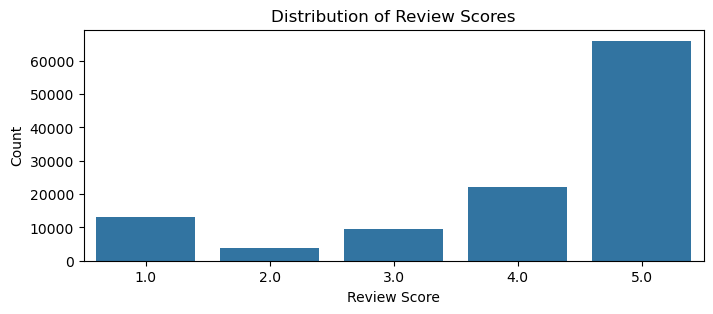

In [52]:
#Distribution of Review Scores

plt.figure(figsize=(8,3))
sns.countplot(data=merged_data, x='review_score')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

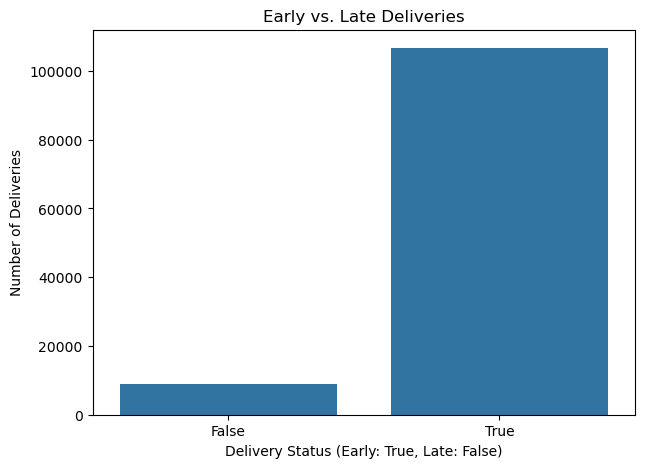

In [54]:
merged_data['early_delivery'] = merged_data['order_delivered_customer_date'] <= merged_data['order_estimated_delivery_date']
delivery_counts = merged_data['early_delivery'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values)
plt.title('Early vs. Late Deliveries')
plt.xlabel('Delivery Status (Early: True, Late: False)')
plt.ylabel('Number of Deliveries')
plt.show()